In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm/modisco_seqlet_occurences/cardiomyocyte"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [3]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_61,xs.pos.pattern_62,xs.pos.pattern_63,xs.pos.pattern_64,xs.pos.pattern_65,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9,xs.neg.pattern_0,xs.neg.pattern_1
0,HiC_scaffold_1,35734,35923,total_peak_1,362,.,3.61945,36.2118,34.34910,86,...,0,0,0,0,0,0,0,0,0,0
1,HiC_scaffold_1,65614,65919,total_peak_7,451,.,4.01287,45.1439,43.23530,143,...,0,0,0,0,0,0,0,0,0,0
2,HiC_scaffold_1,106547,106918,total_peak_9,1913,.,8.76011,191.3330,189.06600,240,...,0,0,0,0,0,0,0,0,0,0
3,HiC_scaffold_1,116919,117150,total_peak_12,112,.,2.25560,11.2758,9.64009,122,...,0,0,0,0,0,0,0,0,0,0
4,HiC_scaffold_1,127910,129282,total_peak_13a,4806,.,4.58859,480.6900,478.10800,212,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240467,HiC_scaffold_9,73242165,73243354,total_peak_270699a,545,.,2.02610,54.5821,52.63290,117,...,0,0,0,0,0,0,0,0,0,0
240468,HiC_scaffold_9,73242165,73243354,total_peak_270699b,3601,.,4.13738,360.1420,357.66800,372,...,0,0,0,0,0,0,0,0,0,0
240469,HiC_scaffold_9,73242165,73243354,total_peak_270699c,54150,.,20.12840,5415.0600,5410.45000,715,...,0,0,0,0,0,0,0,0,0,0
240470,HiC_scaffold_9,73334036,73334235,total_peak_270701,210,.,2.85884,21.0093,19.25490,103,...,0,0,0,0,0,0,0,0,0,0


In [4]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [7]:
from IPython.display import display


In [8]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_16129/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)
/tmp/ipykernel_16129/3756136185.py:12: RuntimeWarning: divide by zero encountered in log10
  counts_nlp = -np.log10(counts_p)


,pattern,counts_lfc,shap_lfc,counts_nlp,shap_nlp
0,ss.pos.pattern_0,0.069512,-0.037163,228.931711,inf
58,xs.pos.pattern_0,0.069420,-0.036629,243.402970,inf
103,xs.pos.pattern_5,-0.129782,-0.036918,inf,inf
44,ss.pos.pattern_7,-0.340858,-0.055046,inf,inf
81,xs.pos.pattern_3,-0.109352,-0.035160,inf,inf
70,xs.pos.pattern_2,0.081802,-0.041495,178.208542,inf
6,ss.pos.pattern_14,-0.443694,-0.055159,inf,inf
45,ss.pos.pattern_8,-0.401618,-0.060129,inf,inf
1,ss.pos.pattern_1,-0.090912,-0.060093,71.154847,inf
23,ss.pos.pattern_3,-0.205671,-0.039575,inf,inf


In [9]:
import seaborn as sns
sns.set()

In [10]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

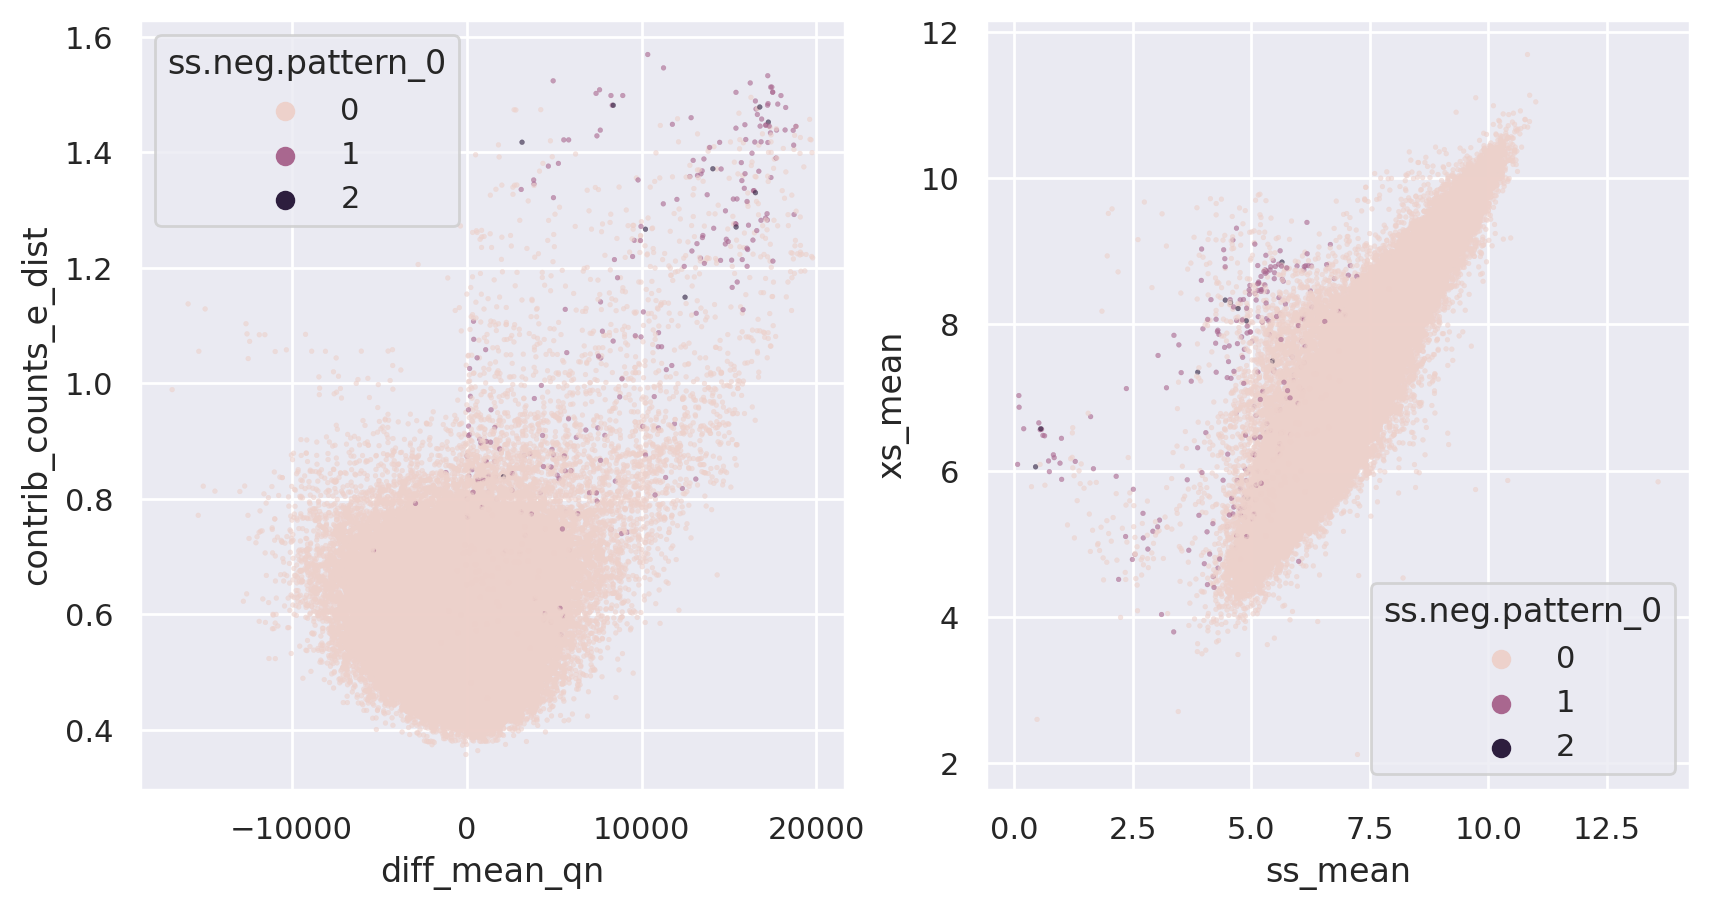

In [50]:
plot_pattern("ss.neg.pattern_0")


In [ ]:
plot_pattern("ss.neg.pattern_1")


/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/users/atwang/miniconda3/envs/gp_mouse_genome_transfer_notebooks/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


Error in callback <function flush_figures at 0x7f689744c700> (for post_execute):


In [ ]:
plot_pattern("ss.neg.pattern_2")



In [ ]:
plot_pattern("ss.neg.pattern_3")


In [ ]:
plot_pattern("ss.neg.pattern_4")


In [ ]:
plot_pattern("ss.neg.pattern_5")


In [ ]:
plot_pattern("ss.neg.pattern_6")


In [ ]:
plot_pattern("ss.neg.pattern_7")


In [ ]:
plot_pattern("ss.neg.pattern_8")


In [ ]:
plot_pattern("ss.neg.pattern_9")


In [ ]:
plot_pattern("xs.pos.pattern_39")


In [ ]:
plot_pattern("xs.pos.pattern_45")
